## Example d'utilisation de la classe ModelLearning ou de toute classe enfant

In [1]:
import numpy as np
import math
import time
import pandas as pd
from tqdm import tqdm
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

import data
import features
from model_tree_regressor import ModelTreeRegressor

### Details

* **Version 1**: basique
* **Version 2**: moyenne des valeurs entre le premier intervale 0h-.. et le dernier ..-24h pour ne pas avoir de palier à minuit
* **Version 3**:

In [2]:
version = 1

In [3]:
temp, dico = data.load_input_data('data/train_input.csv')
output = data.load_output_data('data/challenge_output.csv', temp, dico)
all_features = features.load_all_features(dico, temp, version, remove_useless=True)

100%|████████████████████████████████████████████████████████████████████████████████| 240/240 [00:10<00:00, 23.83it/s]


All the features have been loaded in 10.09 sec (version 1 of the features)
16 useless features have been removed. There are now 17 features for each setting.


In [4]:
model = ModelTreeRegressor(all_features, output)

In [5]:
# Metrics sur toutes les variables à prédire. Moyenne sur N separations train/test
results = model.cross_validate(N=5, pct_train=0.75, do_print=True)

Evolution of the 5 iterations:


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [03:55<00:00, 47.09s/it]


Average mse of office_temperature_degreC: 0.32345145316767254
Average mse / max of office_temperature_degreC: 0.0003220479182421989
Average mse of Q_total_heating_kW: 157.6530583677744
Average mse / max of Q_total_heating_kW: 0.15696896320802195
Average mse of Q_total_AC_kW: 117.28954411000481
Average mse / max of Q_total_AC_kW: 0.11678059610578628
Average mse of Q_total_gains_kW: 2.002830148566318e-21
Average mse / max of Q_total_gains_kW: 1.9941393789445556e-24
Average mse of Q_total_kW: 273.57414582347036
Average mse / max of Q_total_kW: 0.27238704072745207


### Train model on all data to apply it on eval data

In [5]:
models = {}
# Train model on all the data
model.load_train_test_set(pct_train=1.)

for var in model.output_names:
    print("Learning on '{}'...".format(var))
    model.fit_model(var)
    models[var] = model.model

Learning on 'office_temperature_degreC'...
Learning on 'Q_total_heating_kW'...
Learning on 'Q_total_AC_kW'...
Learning on 'Q_total_gains_kW'...
Learning on 'Q_total_kW'...


In [6]:
X_val = features.load_data_features('./data/test_input.csv', version)

100%|██████████████████████████████████████████████████████████████████████████████████| 36/36 [00:01<00:00, 23.55it/s]


All the features have been loaded in 1.53 sec (version 1 of the features)
16 useless features have been removed. There are now 17 features for each setting.


In [7]:
model.save_output(models, './data/test.csv', X_val)

100%|███████████████████████████████████████████████████████████████████████| 314496/314496 [00:11<00:00, 26525.95it/s]


File saved at './data/test.csv'


# Affichage de courbes prediction Vs ground truth

In [4]:
model = ModelTreeRegressor(all_features, output)
model.load_train_test_set()

**1. Q_total_AC_kW **

In [5]:
model.train_model_to_plot('Q_total_AC_kW')

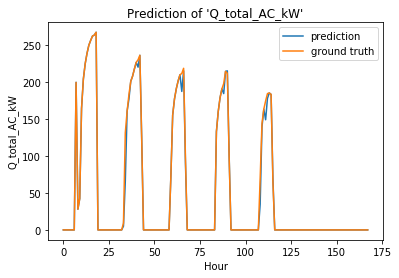

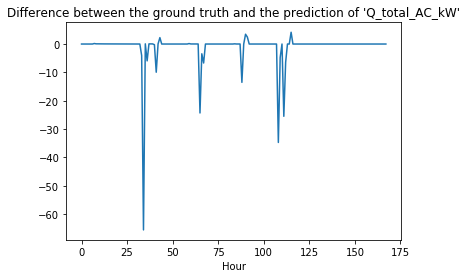

In [7]:
num_sem = 25
n1 = 7*24*num_sem
n2 = 7*24*(num_sem+1)

model.plot_period(n1, n2)

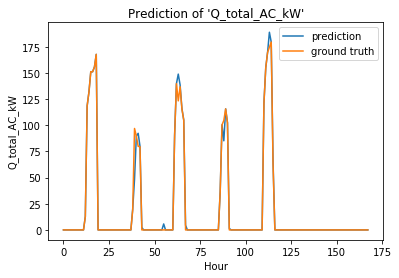

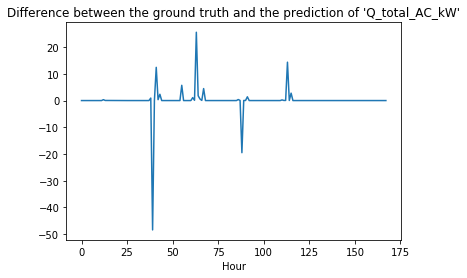

In [8]:
num_sem2 = 20
model.plot_period(7*24*num_sem2, 7*24*(num_sem2 + 1))

**2. Q_total_heating_kW **

In [9]:
model.train_model_to_plot('Q_total_AC_kW')

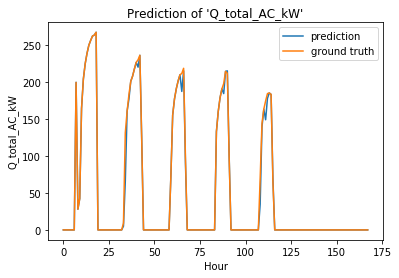

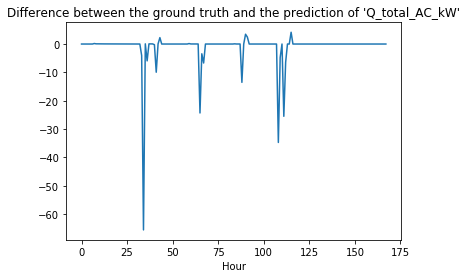

In [10]:
num_sem = 25
n1 = 7*24*num_sem
n2 = 7*24*(num_sem+1)

model.plot_period(n1, n2)

**3. Q_total_gains_kW**

In [11]:
output['fields']

{'Q_total_AC_kW': 2,
 'Q_total_gains_kW': 3,
 'Q_total_heating_kW': 1,
 'Q_total_kW': 4,
 'office_temperature_degreC': 0}

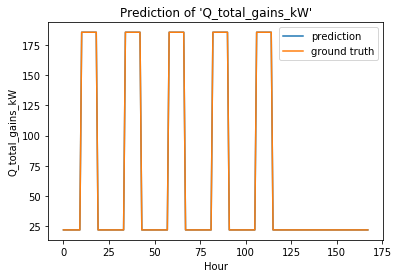

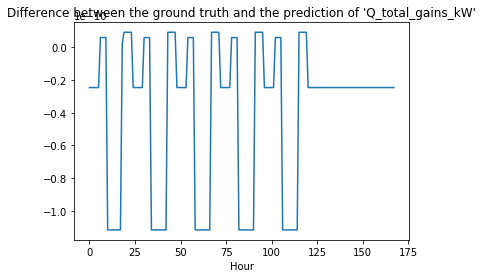

In [12]:
model.train_model_to_plot('Q_total_gains_kW')

num_sem = 25
n1 = 7*24*num_sem
n2 = 7*24*(num_sem+1)

model.plot_period(n1, n2)

**4. Q_total_kW**

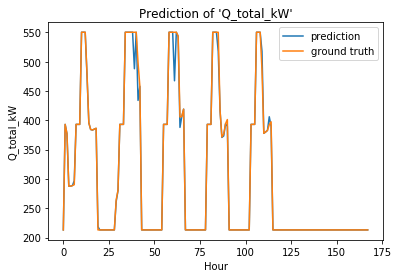

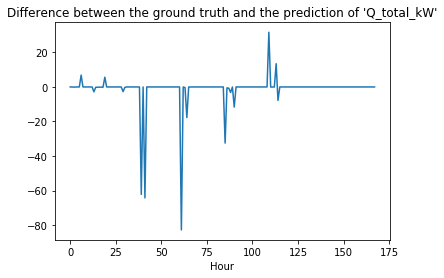

In [13]:
model.train_model_to_plot('Q_total_kW')

num_sem = 155
n1 = 7*24*num_sem
n2 = 7*24*(num_sem+1)

model.plot_period(n1, n2)

**5. office_temperature_degreC**

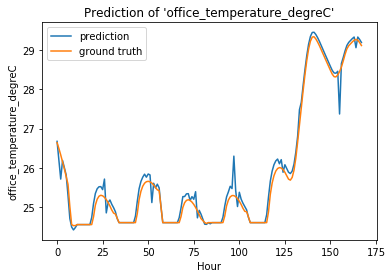

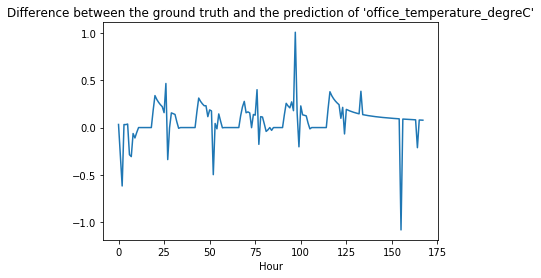

In [14]:
model.train_model_to_plot('office_temperature_degreC')

num_sem = 500
n1 = 7*24*num_sem
n2 = 7*24*(num_sem+1)

model.plot_period(n1, n2)

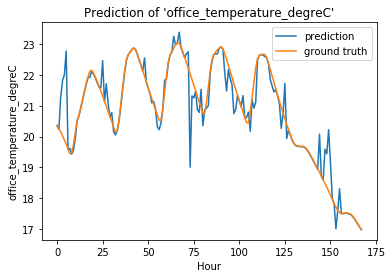

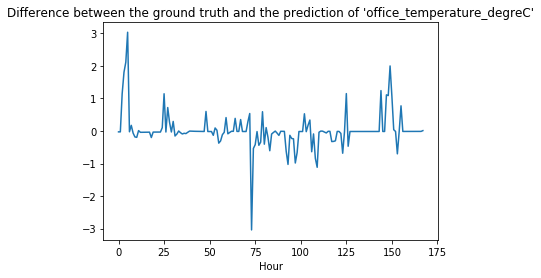

In [15]:
num_sem = 250
n1 = 7*24*num_sem
n2 = 7*24*(num_sem+1)

model.plot_period(n1, n2)